In [1]:
import numpy as np
import matplotlib.pyplot as plt

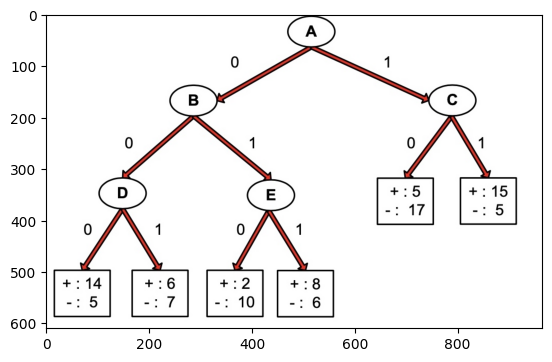

In [2]:
tree = plt.imread('data/tast2_decision_tree.jpg')

plt.imshow(tree)
plt.show()

In [3]:
## Decision Tree

# ln = Leaf Node

ln1 = {'+':14, '-':5}
ln2 = {'+':6, '-':7}
ln3 = {'+':2, '-':10}
ln4 = {'+':8, '-':6}
ln5 = {'+':5, '-':17}
ln6 = {'+':15, '-':5}

leaf_nodes = [ln1, ln2, ln3, ln4, ln5, ln6]

DecisionTree = {'A': {0: 'B', 1: 'C'}, 
                'B': {0: 'D', 1: 'E'}, 
                'C': {0: ln5, 1: ln6}, 
                'D': {0: ln1, 1: ln2}, 
                'E': {0: ln3, 1: ln4}}

### A) Training rate of the decision tree

In [6]:
error_rates = []
for i, leaf_node in enumerate(leaf_nodes):
    wrongly_classified = min(leaf_node, key = leaf_node.get)
    error_rates.append(leaf_node[wrongly_classified]/sum(leaf_node.values()))
    print(f'Leaf Node {i+1}: \n {wrongly_classified = }, total items = {leaf_node.values()}, number of wrongly classified = {leaf_node[wrongly_classified]}, error rate = {leaf_node[wrongly_classified]/sum(leaf_node.values()):0.02f}')

print(f'\nError rate of the decision tree: {np.average(error_rates): 0.2f}')

Leaf Node 1: 
 wrongly_classified = '-', total items = dict_values([14, 5]), number of wrongly classified = 5, error rate = 0.26
Leaf Node 2: 
 wrongly_classified = '+', total items = dict_values([6, 7]), number of wrongly classified = 6, error rate = 0.46
Leaf Node 3: 
 wrongly_classified = '+', total items = dict_values([2, 10]), number of wrongly classified = 2, error rate = 0.17
Leaf Node 4: 
 wrongly_classified = '-', total items = dict_values([8, 6]), number of wrongly classified = 6, error rate = 0.43
Leaf Node 5: 
 wrongly_classified = '+', total items = dict_values([5, 17]), number of wrongly classified = 5, error rate = 0.23
Leaf Node 6: 
 wrongly_classified = '-', total items = dict_values([15, 5]), number of wrongly classified = 5, error rate = 0.25

Error rate of the decision tree:  0.30


### B) T={A=0, B=1, C=1, D=1, E=0}

In [7]:
T = {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 0}
T2 = {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1}
T3 = {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 0}

In [8]:
def tree_traversal(DecisionTree, T):
    '''
    prints the tree traversal path
    Args:
        DecisionTree (dict): a dictionary containing the subtrees of each node in the tree
        T (dict): the input values
    Return:
        output (str): the classification outcome of the input given to the decision tree
    '''
    # get the first root node
    print(f'{list(T.keys())[0]}->',end='')
    # extract the subtree for the root node for the possible next steps
    subtree = DecisionTree[list(T.keys())[0]]
    # traverse through the given inputs
    for key, value in T.items():
        # find the next nextNode to travel to
        nextNode = DecisionTree[key][value]
        # check if this nextNode is available in the subtree
        if nextNode in subtree.values():
            # if the nextNode is a dict then it must be a leaf node
            if type(nextNode) == dict: # it's a leaf node
                # get the class with maximum values
                output = max(nextNode, key = nextNode.get)
                print(f' {output} ')
                return 
            else:
                print(f' {nextNode}->', end='')
            # if it's not a leaf node traverse to it and update the subtree 
            subtree = DecisionTree[nextNode]
        else: # if the nextNode is not available in the subtree then skip this input value
            continue

In [9]:
tree_traversal(DecisionTree, T)    

A-> B-> E-> - 


In [10]:
tree_traversal(DecisionTree, T2)        

A-> C-> + 


In [11]:
tree_traversal(DecisionTree, T3)

A-> B-> E-> - 
